# Import Libraries 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

# Read Dataset 

In [2]:
df=pd.read_csv(r"C:\Users\akshi\Downloads\Bank Customer Churn Prediction.csv")
df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Check Datatype 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


 # Check Null values from dataset 

In [4]:
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

# Lable Encoding 
It is used for converting string data into numerical form .

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["country"]=le.fit_transform(df["country"])
df["gender"]=le.fit_transform(df["gender"])

# Delet un usefull Column 

In [6]:
del df["customer_id"]

# Set independent and dependent variable 

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

# check count of categories in dependent variable 

In [8]:
from collections import Counter 
print(Counter(y))

Counter({0: 7963, 1: 2037})


# Use Data balancing technique 
SMOTE 

In [9]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_data,y_data=sm.fit_resample(x,y)
print(Counter(y_data))

Counter({1: 7963, 0: 7963})


# Feature Scaling Technique :
It is used for minimise the difference between magnitude of two features .

In [10]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
d=mms.fit_transform(x_data)
d

array([[0.538     , 0.        , 0.        , ..., 1.        , 1.        ,
        0.50673489],
       [0.516     , 1.        , 0.        , ..., 0.        , 1.        ,
        0.56270874],
       [0.304     , 0.        , 0.        , ..., 1.        , 0.        ,
        0.56965435],
       ...,
       [0.868     , 0.        , 0.        , ..., 0.        , 0.        ,
        0.06634253],
       [0.608     , 0.        , 1.        , ..., 0.        , 1.        ,
        0.53509318],
       [0.99      , 0.5       , 0.        , ..., 0.        , 0.        ,
        0.85884463]])

# Split the dataset 

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(d,y_data,test_size=0.2,random_state=11)

In [12]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)

# ANN Model 

In [13]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=25, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(x_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
399/399 [==============================] - 8s 4ms/step - loss: 0.5499 - accuracy: 0.7280
Epoch 2/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4801 - accuracy: 0.7701
Epoch 3/100
399/399 [==============================] - 2s 4ms/step - loss: 0.4626 - accuracy: 0.7819
Epoch 4/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4460 - accuracy: 0.7935
Epoch 5/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4315 - accuracy: 0.8005
Epoch 6/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4212 - accuracy: 0.8036
Epoch 7/100
399/399 [==============================] - 2s 6ms/step - loss: 0.4116 - accuracy: 0.8090
Epoch 8/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4058 - accuracy: 0.8119
Epoch 9/100
399/399 [==============================] - 2s 5ms/step - loss: 0.4016 - accuracy: 0.8144
Epoch 10/100
399/399 [==============================] - 2s 5ms/step - loss: 0.3991 - accura

In [14]:
y_pred = ann.predict(x_test)
y_pred = (y_pred > 0.5)
np.set_printoptions()
print(y_pred)

100/100 [==============================] - 3s 3ms/step
[[False]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]


In [15]:
Pred=[]
for s in y_pred:
    if s==False:
        a=0
        Pred.append(a)
    else: 
        b=1
        Pred.append(b)
print(Pred)

[0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 

In [16]:
Prediction=pd.DataFrame({"Actual":y_test,"Predicted":Pred})
Prediction

,Actual,Predicted
7704,0,0
3245,1,1
15660,1,1
12061,1,1
1895,0,0
...,...,...
15269,1,0
9618,0,0
13859,1,1
10443,1,1


# Confusion Matrix

array([[1429,  199],
       [ 364, 1194]], dtype=int64)

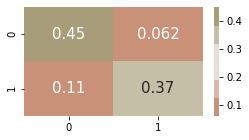

In [17]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import matplotlib.pyplot as plt
cmap1 = sns.diverging_palette(751,75,  s=40, l=65, n=6)
plt.subplots(figsize=(4,2))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})
cf_matrix

# Accuracy Of the Model 

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1628
           1       0.86      0.77      0.81      1558

    accuracy                           0.82      3186
   macro avg       0.83      0.82      0.82      3186
weighted avg       0.83      0.82      0.82      3186



# Accuracy of the ANN model is 82 % so we say that model is better perform 